# ⭐AIFFEL 대전 1기 Exploration 18. OCR⭐
>  프로젝트 소개: 텍스트가 포함된 이미지에서 텍스트 정보를 추출

***

# 🎯 프로젝트 목표
   * Google OCR API, keras-OCR, Tesseract에 대해 알아보기  
   * 문자가 있는 이미지 파일을 가지고 텍스트 인식 해보고 각 모델 비교  
   * 이미지 여러 장을 가지고 실습

***

# ✅프로젝트 순서
## 0. 개념 정리
## 1. 프로젝트
## 2. 회고
- 2-1. 루브릭 평가
- 2-2. 회고

***

# 1. 프로젝트

### 18-9. 프로젝트 : 다양한 OCR모델 비교하기

우리는 지금까지 Google OCR API, keras-ocr, Tesseract 이상 3가지의 OCR 기능을 간단히 활용하여 보았습니다.  

지금까지 살펴본 바로는 무료로 사용할 수 있는 기능들이지만 모두 준수한 성능을 갖추고 있었습니다. OCR 분야가 이미 실용적인 수준에까지 기술이 발전했기 때문에 이런 것들만 잘 활용해도 실전에 활용할 수 있는 좋은 서비스를 만들어 낼 수 있을것도 같습니다. 그런데 과연 어떤 것을 사용하는 것이 좋을까요?  

OCR 기술들이 실용적인 수준까지 꽤 발전했지만 그럼에도 불구하고 아직 완전한 수준은 아닙니다. 용도에 맞게 적절한 것을 선택하는 것도 중요한 일입니다. 그래서 오늘 다뤄본 위 3가지를 검증해 보는 프로젝트를 진행하겠습니다. 여러분은 OCR 기능을 활용한 서비스를 빠르게 개발해야 하는 임무를 맡은 엔지니어가 되어, 어떤 모듈을 도입하면 좋을지 기술검증을 하는 역할을 맡게 되었다고 가정합니다.  

### Step1. 검증용 데이터셋 준비

OCR 관련해서 오늘 다루어본 주제는 텍스트의 모양과 크기, 배치, 노이즈 등 OCR의 성능에 영향을 미치는 요인들에 관한 것이었습니다. 여러분들은 위 3가지 기능들이 이미지에 나타난 특징에 따라 얼마나 정확하게 문자를 detect하고 recognize하는지를 검증하기 위한 이미지 데이터를 모아야 합니다. 이미지가 많을수록 좋겠지만 검증해야 할 항목별로 고루 갖춰지는 것도 중요합니다.  

가능하다면 함께 학습하는 동료들과 힘을 합쳐보는 것을 추천합니다. 그렇다고 너무 많은 이미지 데이터로 검증하는 것은 이후 결과를 정리하는 것이 힘들 수 있으니 테스트용 이미지는 아무리 많아도 20장을 넘기지 않는 것으로 합시다.  

In [1]:
# 이미지 준비하기
import os

img_path = os.getcwd() + '/pics'
img = os.listdir(img_path)
print(img)

['ocr8.jpeg', 'ocr12.png', 'ocr15.jpg', 'ocr14.jpg', 'ocr4.jpeg', 'ocr3.png']


In [2]:
# 현재 디렉토리 변경
os.chdir('./pics')
print(os.getcwd())

/home/aiffel-dj40/1.AIFFEL_Study/Exploration/E18_OCR/pics


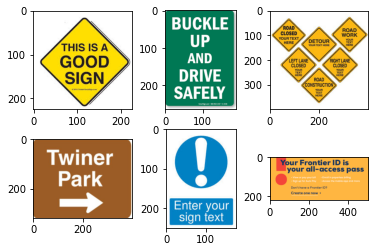

In [3]:
# 이미지 시각화(6장)
import matplotlib.pyplot as plt

for i in range(len(img)):
    plt.subplot(2,3,i+1)
    plt.imshow(plt.imread(img[i]))

### Step2. Google OCR API, keras-ocr, Tesseract로 테스트 진행

위 3가지 모듈을 활용하는 방법에 대해서는 코드 레벨로 이미 경험해 보셨을 것입니다. 이미지 리스트를 정리한 후 반복문을 실행하며 모듈이 출력한 결과를 모아 봅시다.

### 1. Google OCR API

In [4]:
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
       print('\n"{}"'.format(text.description))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                 for vertex in text.bounding_poly.vertices])

    print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

In [16]:
# 다운받은 인증키 경로가 정확하게 지정되어 있어야 합니다. 
!ls -l $GOOGLE_APPLICATION_CREDENTIALS

import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  os.getenv('HOME')+'/aiffel/ocr_python/my_google_api_key.json'

# 입력 이미지 경로를 지정해 주세요.
# (예시) path = os.getenv('HOME')+'/aiffel/ocr_python/test_image.png'
path = os.getenv("HOME") +'/1.AIFFEL_Study/Exploration/E18_OCR/pics/ocr12.png'

# 위에서 정의한 OCR API 이용 함수를 호출해 봅시다.
for image in img:
    detect_text(image)
    print('---------------------------------------------------------------------')

-rw-rw-r-- 1 aiffel-dj40 aiffel-dj40 2355  3월 16 14:10 /home/aiffel-dj40/aiffel/ocr_python/my_google_api_key.json
Texts:

"THIS IS A
GOOD
SIGN
20s
"

"THIS"

"IS"

"A"

"GOOD"

"SIGN"

"20s"
bounds: (90,177),(101,177),(101,183),(90,183)
---------------------------------------------------------------------
Texts:

"BUCKLE
UP
AND
DRIVE
SAFELY
Satig IN
"

"BUCKLE"

"UP"

"AND"

"DRIVE"

"SAFELY"

"Satig"

"IN"
bounds: (152,248),(164,248),(164,251),(152,251)
---------------------------------------------------------------------
Texts:

"ROAD
CLOSED
YOUR TEXT
HERE
ROAD
WORK
DETOUR
YOUR
TEXT
HERE
YOUR TEXT HERE
LEFT LANE
CLOSED
RIGHT LANE
CLOSED
YOUR
TEXT
HERE
YOUR
TEXT
HERE
ROAD
CONSTRUCTION
YOUR
TEXT
HERE
"

"ROAD"

"CLOSED"

"YOUR"

"TEXT"

"HERE"

"ROAD"

"WORK"

"DETOUR"

"YOUR"

"TEXT"

"HERE"

"YOUR"

"TEXT"

"HERE"

"LEFT"

"LANE"

"CLOSED"

"RIGHT"

"LANE"

"CLOSED"

"YOUR"

"TEXT"

"HERE"

"YOUR"

"TEXT"

"HERE"

"ROAD"

"CONSTRUCTION"

"YOUR"

"TEXT"

"HERE"
bounds: (184,341),(212,

\>> Google OCR API 결과: 이미지에 있는 글씨 인식이 잘 되어 보였음. 신기한 점은 맨 마지막 줄에 매우 작은 글씨까지 인식하여 `Satig`, `IN`로 인식했다는 점이다!

***

### 2. keras-ocr

In [6]:
import matplotlib.pyplot as plt
import keras_ocr

# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /home/aiffel-dj40/.keras-ocr/craft_mlt_25k.h5
Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.
Looking for /home/aiffel-dj40/.keras-ocr/crnn_kurapan.h5


### ❗오류 - pipeline.recognize 생성 중 발생  
`operands could not be broadcast together with shapes (528,382,4) (3,) (528,382,4)`  
**브로드캐스팅이 되지 않는 문제**  
[해당 오류에 대한 설명](https://rfriend.tistory.com/287)  
간단하게 말하면 모양이 맞지 않는 문제라고 생각.  

이미지 크기를 하나씩 확인해보니 `1`번 인덱스 이미지 크기가 `264*191`임을 확인했고 이 값을 2배하면 `528*382`임을 짐작할 수 있었다.  
**그렇다면 `1`번 이미지의 `shape`을 확인해보자**

In [7]:
img_array = [plt.imread(i) for i in img]

In [8]:
for i in range(len(img_array)):
    print('{} 인덱스 그림의 크기는: '.format(i), img_array[i].shape)

0 인덱스 그림의 크기는:  (225, 225, 3)
1 인덱스 그림의 크기는:  (264, 191, 4)
2 인덱스 그림의 크기는:  (400, 400, 3)
3 인덱스 그림의 크기는:  (318, 400, 3)
4 인덱스 그림의 크기는:  (250, 176, 3)
5 인덱스 그림의 크기는:  (220, 502, 4)


위의 결과를 보면 `1번`, `5번` 인덱스 이미지의 크기가 이상하다.??  
**우리가 배우기로는 이미지의 shape은 (높이, 너비, 채널수)인데??**  
Q1. 맨 마지막에 있는 `4`는 무슨 의미일까?  
Q2. 그리고 왜 두 이미지만 끝 숫자가 `4`일까?

**Q1. 맨 마지막에 있는 4는 무슨 의미일까?**  
[matplotlib 공식 문서 중 imread 부분](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imread.html)  
plt.imread를 하게 되면 아래와 같이 3가지 형태가 나오게 되는데,  
  
- (M, N) for grayscale images.  
- (M, N, 3) for RGB images.  
- (M, N, 4) for RGBA images.  

**\>> `RGBA 이미지`라는 것이 있나보다!!**  

그럼 `RGBA 이미지`는 무엇일까?  
**\>> 3개의 RGB 색 모델에 4번째 알파 채널이 보충된 것. 알파 채널은 투명도를 의미**  
> 출처: https://ko.wikipedia.org/wiki/RGBA_%EC%83%89_%EA%B3%B5%EA%B0%84

**Q2. 그리고 왜 두 이미지만 끝 숫자가 `4`일까?**  
이 질문의 대한 대답은 의외로 간단했다. 아래 이미지들 이름 리스트를 보자.  
이미지들 이름 리스트 = ['ocr8.jpeg', 'ocr12.png', 'ocr15.jpg', 'ocr14.jpg', 'ocr4.jpeg', 'ocr3.png']  
`1`번과 `5`번 인덱스 이미지는 확장자가 **`png`**이다!!  

**\>> plt.imread()메소드는 `png`확장자를 `RGBA`형식으로 읽는다!**  

### 해결 방법
**\>> cv2.imread() 메소드 사용!**

***

In [9]:
import cv2 
cv2_img_array = [cv2.imread(i) for i in img]

prediction_groups = [pipeline.recognize([url]) for url in cv2_img_array]

이제 인식된 결과를 pyplot으로 시각화를 해봅니다.

사용이 매우 간단합니다! 내부적으로 recognize() 는 검출기와 인식기를 두고, 검출기로 바운딩 박스(bounding box, 문자가 있는 영역을 표시한 정보)를 검출한 뒤, 인식기가 각 박스로부터 문자를 인식하는 과정을 거치도록 합니다.

/home/aiffel-dj40/Downloads/exit/envs/aiffel/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


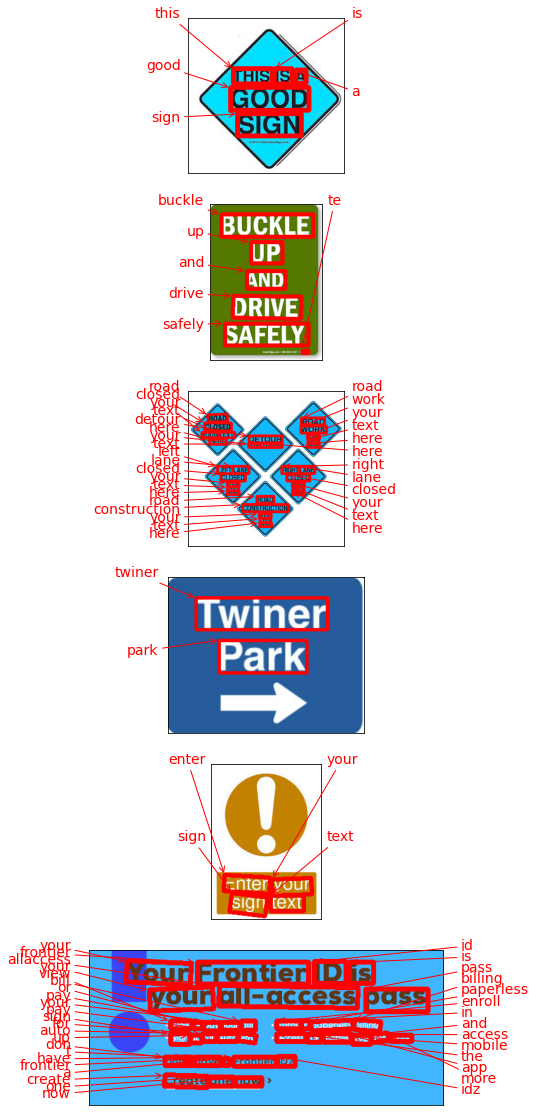

In [10]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(cv2_img_array), figsize=(20, 20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=cv2_img_array[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

\>> keras-ocr 결과: 전반적으로 글씨가 잘 인식되었는데, `1번` 그림(BUCKLE UP AND DRIVE SAFELY)의 결과를 보면 맨 마지막 줄의 글씨를 'te'로 인식했다. 위의 google-OCR API의 경우 앞부분 글자를 인식했는데, 여기서는 뒷 부분을 인식했다. 모델별로 알파벳을 인식하는 성능이 다른것 같다!

***

### 3. Tesseract

이번에는 테서랙트(Tesseract) 라이브러리로 이미지에서 문자를 인식해 보겠습니다. 테서랙트는 구글에서 후원하는 OCR 오픈소스 라이브러리로 현재는 버전 4와 Tessearct.js등으로 확장되는 등 많은 곳에서 사용되고 있습니다. 버전 4에서는 LSTM이 엔진에 추가되었고 현재 한국어를 포함한 116 개 국어를 지원하고 있습니다.

오픈소스라는 점은 여러분들이 원하는 프로젝트에 활용하기 쉽다는 것을 뜻하니, 직접 해 보면서 익혀두면 나중에 간단한 OCR 모델이 필요할 때 빠르게 활용할 수 있을 겁니다.

### Step1. 테서렉트 설치
우선 우분투에서 실행할 경우 터미널에서 아래 코드를 사용해 테서랙트 관련 패키지들을 설치해 주세요. 혹시 다른 운영체제를 사용하실 경우에는 아래 Tesseract Install Guide를 참고해주세요.  
[테서렉트 설치 가이드](https://github.com/tesseract-ocr/tesseract/wiki)  
   
$ sudo apt install tesseract-ocr  

$ sudo apt install libtesseract-dev

### Step2. 테서렉트 파이썬 wrapper 설치  
`Pytesseract`는 OS에 설치된 테서랙트를 파이썬에서 쉽게 사용할 수있도록 해주는 래퍼 라이브러리(wrapper library)입니다. 파이썬 내에서 컴퓨터에 설치된 테서랙트 엔진의 기능을 바로 쓸 수 있도록 해줍니다.

- 참고: [tesseract](https://pypi.org/project/pytesseract/)  
- 참고: [위키백과: 래퍼 라이브러리](https://ko.wikipedia.org/wiki/%EB%9E%98%ED%8D%BC_%EB%9D%BC%EC%9D%B4%EB%B8%8C%EB%9F%AC%EB%A6%AC)  

$ pip install pytesseract  

#### 테서렉트로 문자 검출하고 이미지 자르기(detection)

In [22]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list

In [35]:
cropped_image_path_list = []
for i in range(len(img)):
    cropped_image_path_list.append(crop_word_regions(os.getcwd() + '/' + img[i],os.getcwd() + '/' + folder_list[i]))

for cropped_image in cropped_image_path_list:
    print(cropped_image)
    print('------------------------------------------------------')

/home/aiffel-dj40/1.AIFFEL_Study/Exploration/E18_OCR/pics/ocr8/0000.png
/home/aiffel-dj40/1.AIFFEL_Study/Exploration/E18_OCR/pics/ocr12/0000.png
/home/aiffel-dj40/1.AIFFEL_Study/Exploration/E18_OCR/pics/ocr12/0001.png
/home/aiffel-dj40/1.AIFFEL_Study/Exploration/E18_OCR/pics/ocr12/0002.png
/home/aiffel-dj40/1.AIFFEL_Study/Exploration/E18_OCR/pics/ocr12/0003.png
/home/aiffel-dj40/1.AIFFEL_Study/Exploration/E18_OCR/pics/ocr12/0004.png
/home/aiffel-dj40/1.AIFFEL_Study/Exploration/E18_OCR/pics/ocr12/0005.png
/home/aiffel-dj40/1.AIFFEL_Study/Exploration/E18_OCR/pics/ocr15/0000.png
/home/aiffel-dj40/1.AIFFEL_Study/Exploration/E18_OCR/pics/ocr14/0000.png
/home/aiffel-dj40/1.AIFFEL_Study/Exploration/E18_OCR/pics/ocr14/0001.png
/home/aiffel-dj40/1.AIFFEL_Study/Exploration/E18_OCR/pics/ocr4/0000.png
/home/aiffel-dj40/1.AIFFEL_Study/Exploration/E18_OCR/pics/ocr4/0001.png
/home/aiffel-dj40/1.AIFFEL_Study/Exploration/E18_OCR/pics/ocr4/0002.png
/home/aiffel-dj40/1.AIFFEL_Study/Exploration/E18_OCR/pi

위에서 구현한 crop_word_regions() 함수는 여러분이 선택한 테스트 이미지를 받아서, 문자 검출을 진행한 후, 검출된 문자 영역을 crop한 이미지로 만들어 그 파일들의 list를 리턴하는 함수입니다.

기본적으로 pytesseract.image_to_data() 를 사용합니다. 파이썬에서 편하게 사용하기 위해서 pytesseract 의 Output 을 사용해서 결과값의 형식을 딕셔너리(DICT) 형식으로 설정해주게 됩니다. 이렇게 인식된 결과는 바운딩 박스의 left, top, width, height 정보를 가지게 됩니다. 바운딩 박스를 사용해 이미지의 문자 영역들을 파이썬 PIL(pillow) 또는 opencv 라이브러리를 사용해 잘라(crop)서 cropped_image_path_list에 담아 리턴하였습니다.

(주의) 위 코드에서 lang='kor' 로 바꾸면 에러가 발생합니다. 테서랙트의 언어팩을 설치해야 정상동작하게 됩니다.   
$ sudo apt install tesseract-ocr-kor  

#### 테서렉트로 잘린 이미지에서 단어 인식하기

이제 문자 인식을 해 볼 차례입니다. 검출된 바운딩 박스 별로 잘린 이미지를 넣어주면 영역별 텍스트가 결과값으로 나오는 image_to_string()를 사용하게 됩니다.

이렇게 인식된 결과가 실제 이미지와 맞는지 확인해 봅시다.

In [39]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.

for i in range(len(cropped_image_path_list)):
    print('이미지 이름: ',img[i])
    print(recognize_images(cropped_image_path_list[i]))
    print('------------------------------------------------------')

이미지 이름:  ocr8.jpeg
=

Done
None
------------------------------------------------------
이미지 이름:  ocr12.png
BUCKLE

Ue

AND

DRIVE

SAFELY


Done
None
------------------------------------------------------
이미지 이름:  ocr15.jpg

Done
None
------------------------------------------------------
이미지 이름:  ocr14.jpg
Twiner

Park

Done
None
------------------------------------------------------
이미지 이름:  ocr4.jpeg
Taney

Ae) eis

sign

text

Done
None
------------------------------------------------------
이미지 이름:  ocr3.png
car

=-rontie

rib

ic

you

r ail-access

Vass

* View or pa

y your b

it » Enrollin paperiess billing

am * iene

pforAutoPay~ +

ccess the mobi!

2 app and more

on t

Have

LJ

eErontier

iL)?

—

Create

One

OV

y

Done
None
------------------------------------------------------


### Step3. 테스트 결과 정리

모듈들마다 출력 형태가 다릅니다. 분석을 위해 결과를 일목요연하게 정리해 보는 것이 도움이 될 것입니다. 시각화 방법이 함께 활용된다면 더욱 좋겠군요. 

#### 3장의 이미지에 대한 결과 정리

#### 테스트 이미지 1의 각 모델별 결과
- 비교적 인식하기 쉬운 패턴이라 **<span style="color:green">양호.</span>**

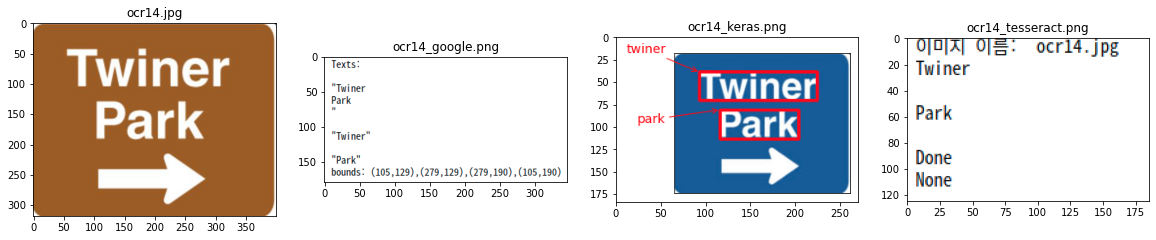

In [61]:
test_img1 = ['ocr14.jpg', 'ocr14_google.png', 'ocr14_keras.png', 'ocr14_tesseract.png']

plt.figure(figsize=(20,15))
for i in range(len(test_img1)):
    plt.subplot(1,4, i+1)
    plt.title(test_img1[i])
    plt.imshow(plt.imread(test_img1[i]))

#### 테스트 이미지 2의 각 모델별 결과
1. google: 큰 글씨를 잘 인식하고 하단의 매우 작은 글씨도 인식하려는 시도가 보임: **<span style="color:green">양호.</span>**  
2. keras: 큰 글씨를 잘 인식하고 하단의 매우 작은 글씨도 인식하려는 시도가 보임(google보단 낮음): **<span style="color:green">양호.</span>**  
3. tesseract: 큰 글씨인 `UP`을 제대로 인식하지 못하고 하단 글씨도 인식하지 못함:  **<span style="color:red">낮음</span>**

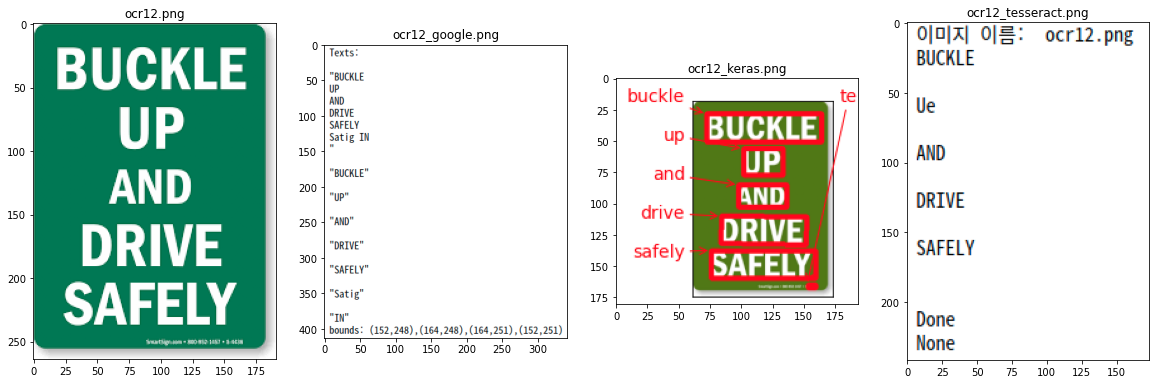

In [63]:
test_img2 = ['ocr12.png', 'ocr12_google.png', 'ocr12_keras.png', 'ocr12_tesseract.png']

plt.figure(figsize=(20,15))
for i in range(len(test_img2)):
    plt.subplot(1,4, i+1)
    plt.title(test_img2[i])
    plt.imshow(plt.imread(test_img2[i]))

#### 테스트 이미지 3의 각 모델별 결과

1. google: 모든 글씨를 잘 인식함: **<span style="color:green">양호.</span>**  
2. keras: 모든 글씨를 잘 인식함: **<span style="color:green">양호.</span>**  
3. tesseract: 이미지 crop도 제대로 못 함. 아무 글씨도 인식 못 함:  **<span style="color:red">낮음</span>**

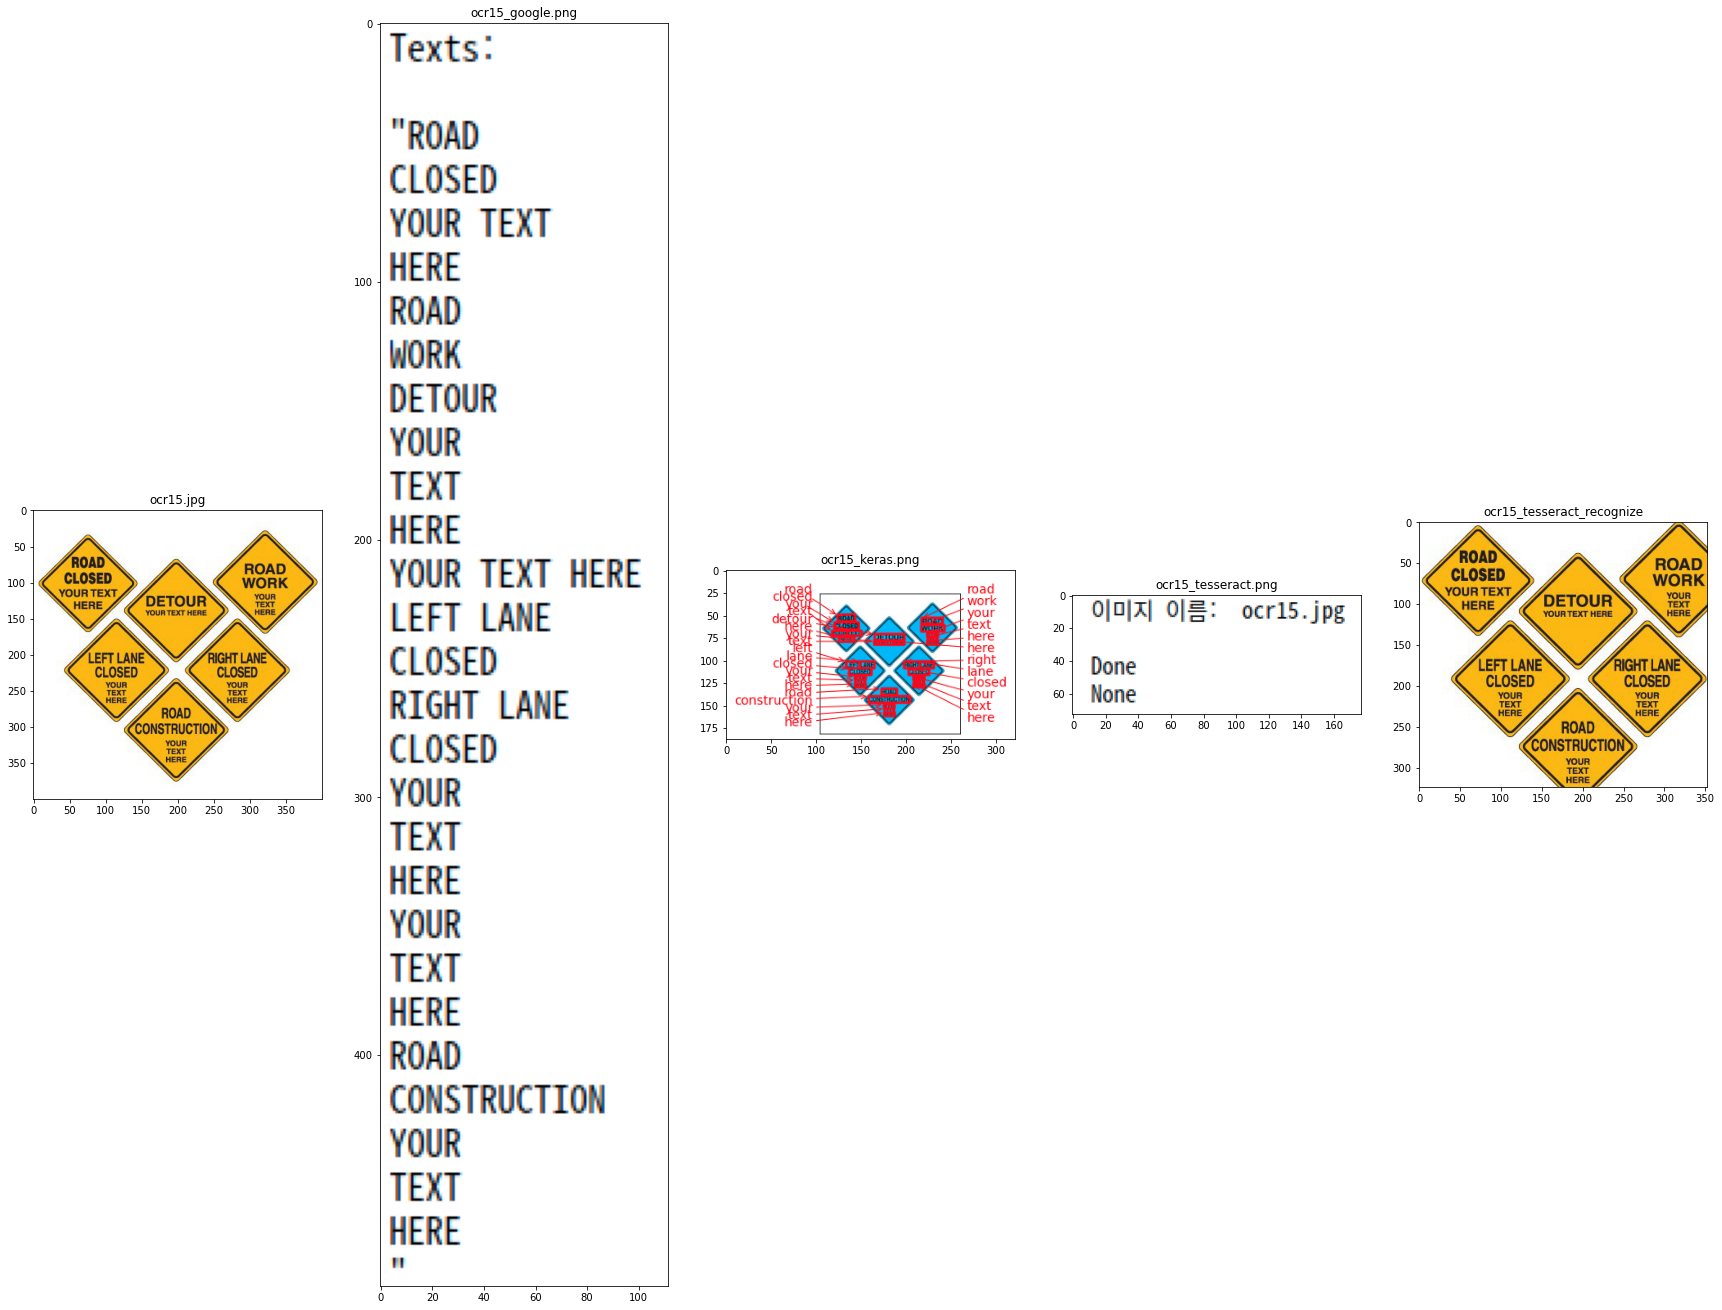

In [71]:
test_img3 = ['ocr15.jpg', 'ocr15_google.png', 'ocr15_keras.png', 'ocr15_tesseract.png']

plt.figure(figsize=(30,25))
for i in range(len(test_img3)):
    plt.subplot(1,5, i+1)
    plt.title(test_img3[i])
    plt.imshow(plt.imread(test_img3[i]))
    
plt.subplot(1,5,5)
plt.title('ocr15_tesseract_recognize')
plt.imshow(plt.imread('ocr15/0000.png'))

### Step4. 결과 분석과 결론 제시

우선 여러분들이 구현하고자 하는 서비스의 목적과 내용을 먼저 정리합니다.  
여러분들이 검토한 OCR 모델들이 그 목적에 부합하는지 확인하기 위해 필요한 평가기준을 제시합니다.  
그 기준에 따라 위에서 정리한 테스트 결과를 분석하여 가장 나은 대안의 모델을 선정합니다.  


**구현하고자 하는 서비스 목적**  
- 시각 장애인을 위한 표지판 읽어주는 서비스  

1. 위 시각화 결과를 보면 `tesseract`는 아직 OCR 성능이 부족하다고 생각된다. 테스트 이미지 3의 경우 제대로 인식도 하지 못했다.  
2. google ocr API, keras ocr 모두 양호하나, 테스트 이미지 2의 인식부분에서 google ocr API가 조금 더 성능이 높다고 판단된다.  
3. 만약 **시각 장애인을 위한 표지판 읽어주는 서비스**개발을 하게 된다면 google ocr API를 우선 적용할 것이다.

***

# 2. 회고

## 2-1. 루브릭
### 1. OCR을 활용하여 구현하려는 서비스의 기획이 타당한가?
(목표로 하는 서비스가 OCR를 적용 가능하며, OCR을 활용했을 때 더욱 유용해진다.)  
- 시각 장애인을 위해 거리의 표지판을 읽어 현재 자신의 상황을 좀 더 분명하게 이해할 수 있을 거으로 예상  

### 2. 모델 평가기준이 명확하고 체계적으로 세워졌는가?  
(평가 기준에 부합하는 테스트 데이터의 특징이 무엇인지 명확하게 제시되었다.)  
- 테스트 이미지의 복잡도를 다양하게 설정해서 평가했다.  

### 3. 평가기준에 따라 충분한 분량의 테스트가 진행되고 그 결과가 잘 정리되었는가?
(최대 20장까지의 테스트 이미지를 사용해 제시된 평가 기준에 따른 테스트 결과가 잘 정리되어 결론이 도출되었다.)  
- 사진은 총 6장으로 진행했으며 다양한 이미지를 제시하고 평가했다.

## 2-2. 회고
1. OCR? 이라고 하면 동떨어진 기술 같지만 실제로 주차를 할 때 많이 접하고 있는 기술이다.  
2. 이미지로부터 텍스트를 읽어내는 기술은 대량의 서류 작업(디지털화 작업)에서 유용할 것이다. 특히 종이를 낭비하지 않는 측면에선.  
3. 총 3가지 모델을 경험했는데 역시 Google가 만든 모델이 단연 돋보였다.  
**4. 오류가 났던 부분: keras-ocr을 진행하던 중 생겼는데, `plt.imread`가 아닌 `cv2.imread`를 통해 해결했고, `RGBA`라는 새로운 포멧도 알게 되었다.**  
5. 앞으로는 이미지, 텍스트 모두 융합의 시대로 가는데 내가 하려는 자율주행 자동차 부분에서도 이미지로부터 텍스트를 인식해서 판단을 내리는 알고리즘도 생각해 볼 수 있겠다.